In [3]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models

교통량은 어떤 요인에 영향을 받을지 생각


1.시간 요인

사람들이 운전을 주로 하는 시간대가 있을 것이다. 특별한 경우를 제외하고는 새벽시간대에는 교통량이 적을 것

2.도로 요인

도로마다 가는 지역이 다름 그렇다는 뜻은 인구가 많이 사는 지역을 통과하는 도로일 수록 교통량이 많을 것

# 날짜와 시간별로 도로 확인

In [4]:
train = pd.read_csv('./data/train.csv')

In [5]:
train.set_index(['날짜','시간'], inplace=True)

In [7]:
train

10     100    101    120    121   140     150   160    200  \
날짜       시간                                                                   
20200101 0    83247   19128   2611   5161   1588   892   32263  1636   7938   
         1    89309   19027   3337   5502   1650  1043   35609  1644   9896   
         2    66611   14710   2970   4631   1044   921   26821  1104   9343   
         3    53290   13753   2270   4242   1021   790   21322   909  10009   
         4    52095   17615   2406   3689   1840   922   22711  1354  15497   
...             ...     ...    ...    ...    ...   ...     ...   ...    ...   
20200517 19  311727  101285  10085  30637  10060  8749  148935  6801  26101   
         20  305354   91426   8607  26021   8095  7198  136503  6147  20759   
         21  306008   75113   6325  19933   5711  4494  129412  5134  14496   
         22  237447   49498   4209  12145   3891  2718   96698  3526   9363   
         23  150312   27410   2350   6406   1803  1614   55788  1849   5722   

              201  ...  1020   1040   1100   1200  1510   2510  3000   4510  \
날짜       시간        ...                                                        
20200101 0   1894  ...  1311   3482  11299   7072  1176   3810   748   3920   
         1   1967  ...  1162   3849  13180   8771  1283   3763   782   3483   
         2   1838  ...   768   2299   7986   5426  1536   3229   491   2634   
         3   1630  ...   632   1716   5703   3156  1104   2882   431   2488   
         4   1264  ...   875   2421   5816   2933  1206   2433   499   2952   
...           ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
20200517 19  9370  ...  6726  15431  25597  14292  9300  22238  3786  16936   
         20  8432  ...  5501  15378  24661  14747  8239  20604  3203  15018   
         21  6739  ...  4216  12558  22781  14081  6392  17937  2447  12403   
         22  4543  ...  2578   8870  16640  11066  4427  11955  1495   7507   
         23  2611  ...  1377   5021  10058   7139  2250   6844   735   4116   

              5510   6000  
날짜       시간                
20200101 0    2133   3799  
         1    2057   4010  
         2    1526   3388  
         3    1268   3686  
         4    1927   5608  
...            ...    ...  
20200517 19  10729  20194  
         20   9767  17962  
         21   7825  14031  
         22   5387   8889  
         23   3046   4606  

[3279 rows x 35 columns]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr

In [9]:
train[:100]

10    100   101   120   121   140    150   160    200   201  \
날짜       시간                                                                    
20200101 0    83247  19128  2611  5161  1588   892  32263  1636   7938  1894   
         1    89309  19027  3337  5502  1650  1043  35609  1644   9896  1967   
         2    66611  14710  2970  4631  1044   921  26821  1104   9343  1838   
         3    53290  13753  2270  4242  1021   790  21322   909  10009  1630   
         4    52095  17615  2406  3689  1840   922  22711  1354  15497  1264   
...             ...    ...   ...   ...   ...   ...    ...   ...    ...   ...   
20200104 23  113008  23477  2109  6040  2132  1263  43052  1822   4574  1898   
20200105 0    71491  14786  1344  3712  1254   819  28791  1264   3346  1074   
         1    47490   9433   847  2993   730   416  20033   813   2053   996   
         2    32479   5977   658  1913   640   419  14930   435   1371   554   
         3    26481   6018   534  1440   503   386  11513   431   1219   529   

             ...  1020  1040   1100  1200  1510  2510  3000  4510  5510  6000  
날짜       시간  ...                                                               
20200101 0   ...  1311  3482  11299  7072  1176  3810   748  3920  2133  3799  
         1   ...  1162  3849  13180  8771  1283  3763   782  3483  2057  4010  
         2   ...   768  2299   7986  5426  1536  3229   491  2634  1526  3388  
         3   ...   632  1716   5703  3156  1104  2882   431  2488  1268  3686  
         4   ...   875  2421   5816  2933  1206  2433   499  2952  1927  5608  
...          ...   ...   ...    ...   ...   ...   ...   ...   ...   ...   ...  
20200104 23  ...  1631  4752  11287  8782  1751  4787   826  4128  2464  4248  
20200105 0   ...  1037  2928   7578  6066  1226  2814   501  2693  1752  2665  
         1   ...   704  2056   4869  4220   888  1538   364  1981  1114  1684  
         2   ...   425  1566   3642  3027   700  1306   211  1200   643  1129  
         3   ...   355  1184   3030  2460   530  1089   185  1197   547  1066  

[100 rows x 35 columns]

In [10]:
train.iloc[:,2:].columns #날짜와 시간 컬럼을 뺀 나머지 도로컬럼들

Index(['101', '120', '121', '140', '150', '160', '200', '201', '251', '270',
       '300', '301', '351', '352', '370', '400', '450', '500', '550', '600',
       '650', '652', '1000', '1020', '1040', '1100', '1200', '1510', '2510',
       '3000', '4510', '5510', '6000'],
      dtype='object')

## 도로별 교통량의 분포를 확인

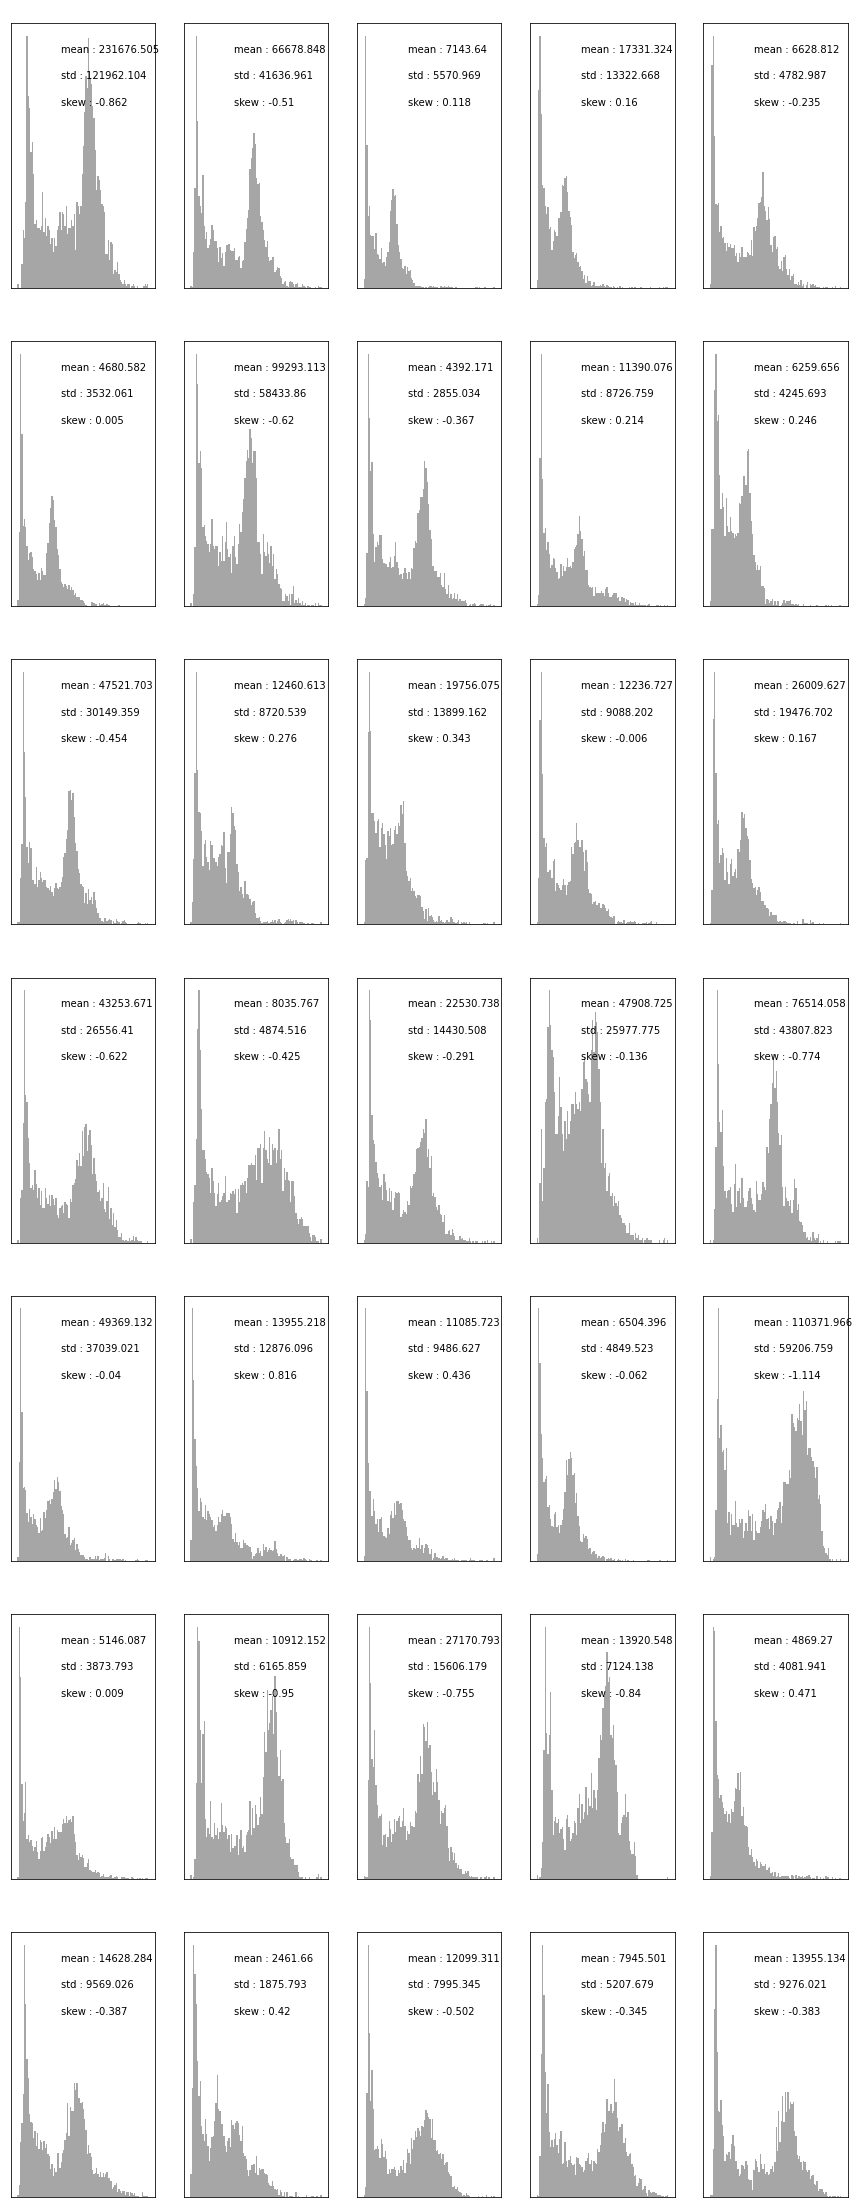

In [46]:
fig = plt.figure(figsize = (15, 40))

for i,col in enumerate(train.iloc[:,2:].columns):
    ax = plt.subplot(7, 5, i+1)
    traffic = train[col].values
    mean = traffic.mean().round(3)
    std = traffic.std().round(3)
    skew = (3*(mean - np.median(traffic))/traffic.std()).round(3)
    if skew >= 1.5:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'red')
    elif skew <= -1.5:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'blue')
    else:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'gray')
    title_font = {'color':'white'}
    plt.title(f'highway{col}',fontdict=title_font)
   
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

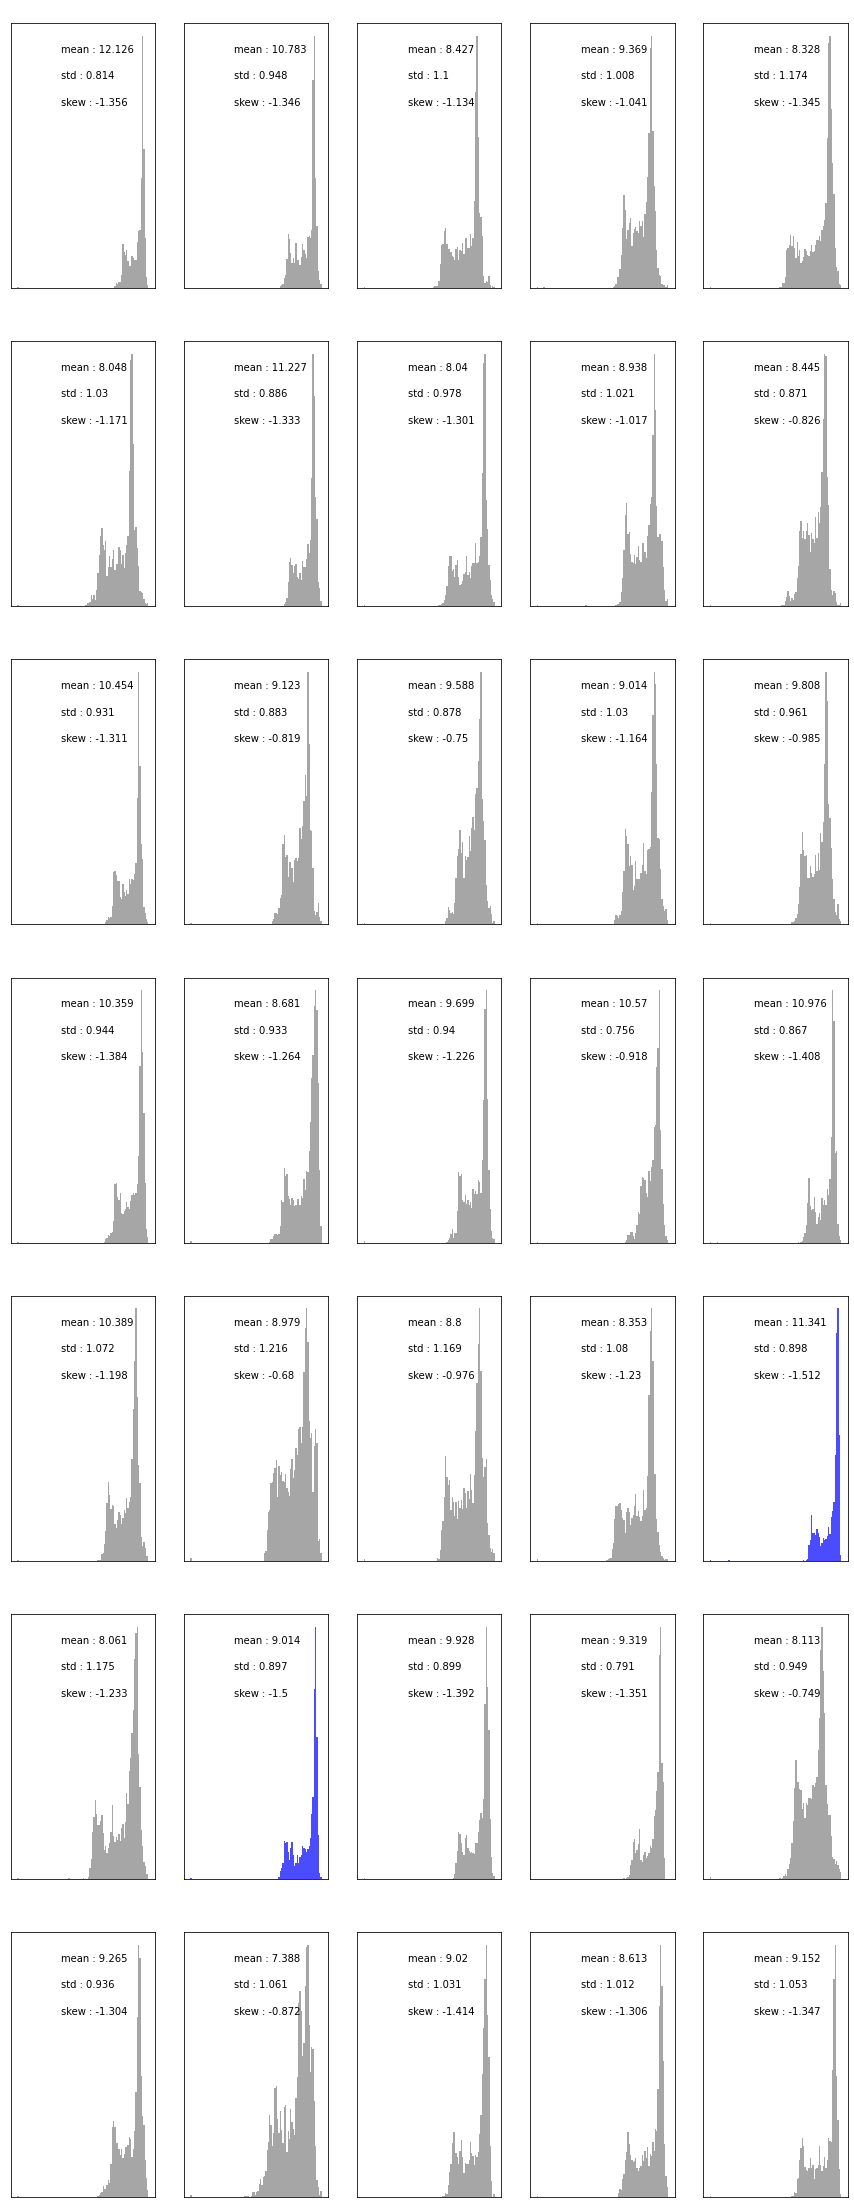

In [47]:
fig = plt.figure(figsize = (15, 40))

for i,col in enumerate(train.iloc[:,2:].columns):
    ax = plt.subplot(7, 5, i+1)
    traffic = np.log(1+train[col].values) #로그변환을 하면 왜도가 더 준다고 하여 해보았으나 오히려 늘었음
    mean = traffic.mean().round(3)
    std = traffic.std().round(3)
    skew = (3*(mean - np.median(traffic))/traffic.std()).round(3)
    if skew >= 1.5:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'red')
    elif skew <= -1.5:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'blue')
    else:
        plt.hist(traffic, alpha = 0.7, bins = 100, color = 'gray')
    title_font = {'color':'white'}
    plt.title(f'highway{col}',fontdict=title_font)
   
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

## 시간별 평균 교통량을 히트맵으로 표현

In [101]:
example=train.groupby(['시간'])['1000'].mean().reset_index().set_index('시간',drop=True).T

<AxesSubplot:xlabel='시간'>

/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


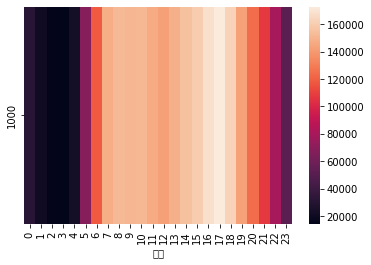

In [103]:
sns.heatmap(example)

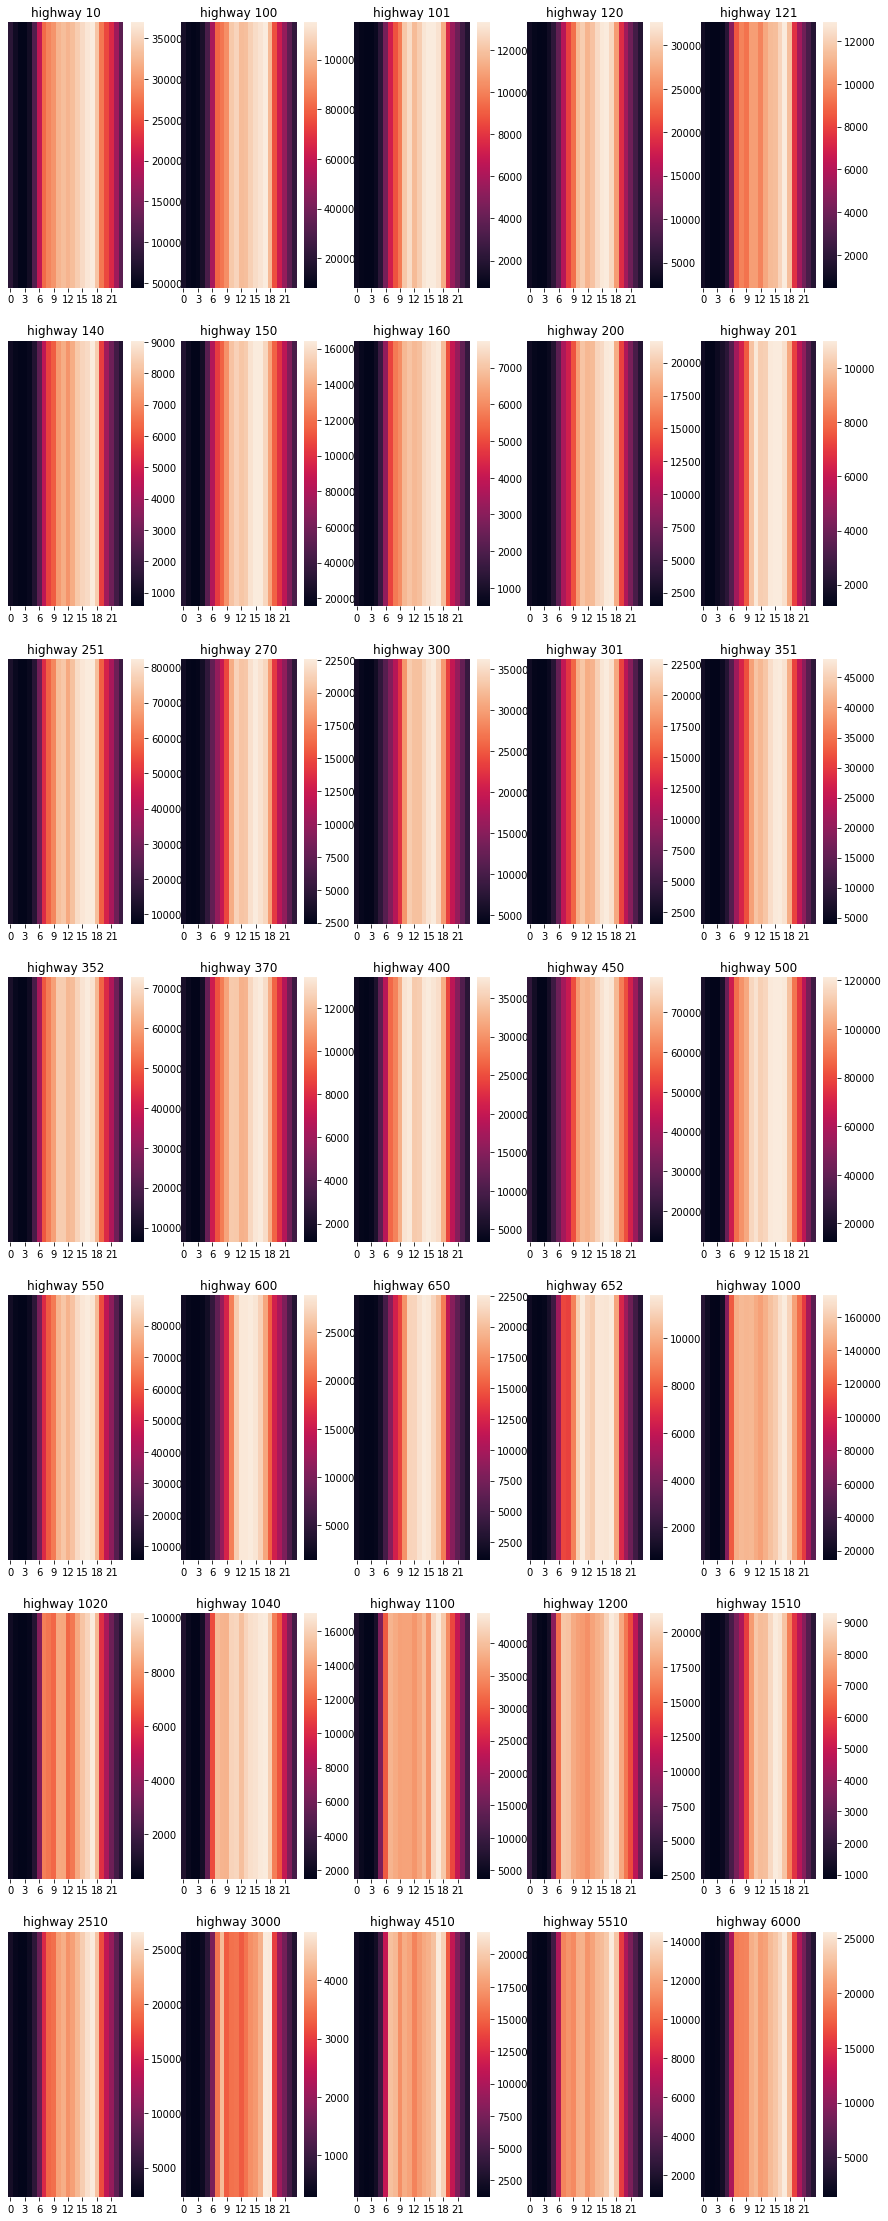

In [114]:
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for i,col in enumerate(train.iloc[:,2:].columns):
    
    df=train.groupby(['시간'])[col].mean().reset_index().set_index('시간',drop=True).T
    plt.subplot(7, 5, i+1)
    sns.heatmap(df)
    plt.title(f'highway {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

거의 모든 도로가 6~18시 >출근시간 교통량이 많음

도로들의 시간대별 교통량은 비슷한 양상을 보임으로
도로간의 클러스터링을 하려면 도로별 교통량이 비슷한 것 끼리 해야할 것 같음

In [142]:
train=train.groupby(['시간']).mean().reset_index().set_index('시간',drop=True)

In [143]:
train

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
시간,,,,,,,,,,,,,,,,,,,,,
0,2.020030e+07,80173.623188,14637.514493,1191.695652,3398.949275,1061.710145,940.739130,29371.782609,986.413043,2293.826087,...,788.920290,2785.108696,7360.036232,5138.797101,1285.442029,3703.579710,487.340580,2171.231884,1538.115942,2276.376812
1,2.020030e+07,56958.166667,9971.543478,832.840580,2504.376812,693.934783,696.550725,20529.905797,675.985507,1752.195652,...,506.862319,1902.710145,4772.702899,3432.659420,1048.797101,2752.789855,344.318841,1497.782609,1077.130435,1644.992754
2,2.020030e+07,45276.000000,8235.379562,720.394161,2136.605839,496.036496,581.802920,15929.248175,515.102190,1504.729927,...,375.919708,1490.175182,3715.751825,2521.416058,879.635036,2331.861314,284.773723,1235.905109,902.058394,1384.875912
3,2.020030e+07,44243.642336,9517.306569,754.343066,2271.481752,479.773723,590.372263,15785.058394,523.437956,1558.722628,...,364.437956,1545.620438,3823.116788,2271.072993,871.014599,2392.343066,279.058394,1407.700730,912.343066,1631.167883
4,2.020030e+07,60451.605839,15585.000000,1103.401460,3506.350365,702.452555,778.000000,23621.233577,811.919708,1994.700730,...,547.583942,2368.321168,6315.277372,3254.635036,1102.890511,3204.204380,433.562044,2276.386861,1450.313869,2682.540146
5,2.020030e+07,113564.941606,28735.846715,2178.284672,5852.773723,1787.372263,1353.116788,50237.467153,1635.532847,3422.934307,...,1300.817518,5398.437956,16769.569343,8857.583942,1622.795620,5214.175182,806.481752,4621.868613,3200.722628,5715.686131
6,2.020030e+07,198701.598540,52821.182482,4494.291971,9972.007299,4753.160584,2598.817518,81141.956204,3147.985401,6295.182482,...,3642.810219,11239.386861,30466.437956,15553.664234,2458.240876,8905.875912,1696.664234,11140.335766,6775.197080,11762.065693
7,2.020030e+07,266732.175182,80249.963504,7204.416058,15757.153285,8476.416058,4533.248175,103681.000000,4907.386861,10043.189781,...,7535.817518,15056.058394,38800.759124,19477.000000,3433.956204,15621.525547,3510.043796,19508.094891,10979.883212,18907.204380
8,2.020030e+07,286127.204380,84341.255474,8747.613139,20428.569343,9633.941606,5673.605839,115630.459854,5710.233577,11888.014599,...,7345.678832,14841.423358,37783.875912,19289.437956,4463.795620,18831.131387,4287.306569,19047.416058,11475.270073,19187.832117


In [144]:
train.drop(['날짜'],axis=1,inplace=True)

In [145]:
df=train.T

In [152]:
df.iloc[:,0:]

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
10,80173.623188,56958.166667,45276.000000,44243.642336,60451.605839,113564.941606,198701.598540,266732.175182,286127.204380,297369.978102,...,343933.948529,355188.426471,365293.705882,369459.698529,335238.036765,277572.352941,245752.264706,221562.360294,173364.213235,121464.860294
100,14637.514493,9971.543478,8235.379562,9517.306569,15585.000000,28735.846715,52821.182482,80249.963504,84341.255474,90012.138686,...,107120.691176,110664.889706,112852.735294,114953.919118,101100.926471,76171.779412,62229.558824,47894.720588,34289.360294,22820.786765
101,1191.695652,832.840580,720.394161,754.343066,1103.401460,2178.284672,4494.291971,7204.416058,8747.613139,9778.700730,...,13063.080882,13302.977941,13263.132353,13000.286765,11274.985294,7516.147059,5497.941176,4252.522059,2796.529412,1839.882353
120,3398.949275,2504.376812,2136.605839,2271.481752,3506.350365,5852.773723,9972.007299,15757.153285,20428.569343,23424.043796,...,31216.845588,32290.948529,32624.433824,31071.801471,26519.573529,19127.088235,14300.875000,10812.198529,7588.492647,5071.500000
121,1061.710145,693.934783,496.036496,479.773723,702.452555,1787.372263,4753.160584,8476.416058,9633.941606,9208.007299,...,11315.455882,11382.580882,12109.720588,12865.338235,11454.257353,7516.772059,5472.227941,4037.757353,2884.169118,1735.676471
140,940.739130,696.550725,581.802920,590.372263,778.000000,1353.116788,2598.817518,4533.248175,5673.605839,6155.525547,...,8247.691176,8531.750000,8643.000000,9037.764706,8321.176471,5634.007353,3967.352941,2989.617647,2066.919118,1385.404412
150,29371.782609,20529.905797,15929.248175,15785.058394,23621.233577,50237.467153,81141.956204,103681.000000,115630.459854,130898.058394,...,160493.367647,164515.411765,164395.227941,156267.272059,137538.941176,115598.544118,101184.992647,85340.470588,64557.029412,44581.794118
160,986.413043,675.985507,515.102190,523.437956,811.919708,1635.532847,3147.985401,4907.386861,5710.233577,6020.350365,...,7315.264706,7465.455882,7629.352941,7733.286765,6858.022059,5075.316176,3999.830882,3240.647059,2334.139706,1536.205882
200,2293.826087,1752.195652,1504.729927,1558.722628,1994.700730,3422.934307,6295.182482,10043.189781,11888.014599,14400.321168,...,20441.757353,20763.507353,21561.595588,21676.205882,18376.382353,13707.830882,10176.323529,7721.705882,5316.941176,3448.154412
201,1609.326087,1275.123188,1219.386861,1557.722628,1880.014599,2368.306569,3392.255474,5167.255474,6386.832117,7641.576642,...,10959.426471,11018.808824,11024.294118,10713.911765,9351.750000,7083.294118,5838.985294,4721.051471,3447.617647,2327.750000


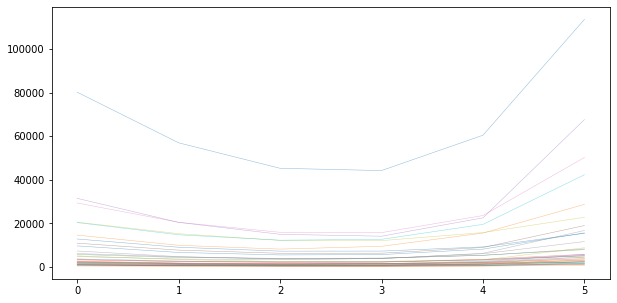

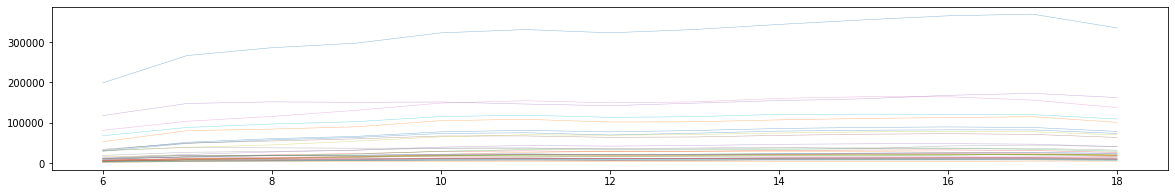

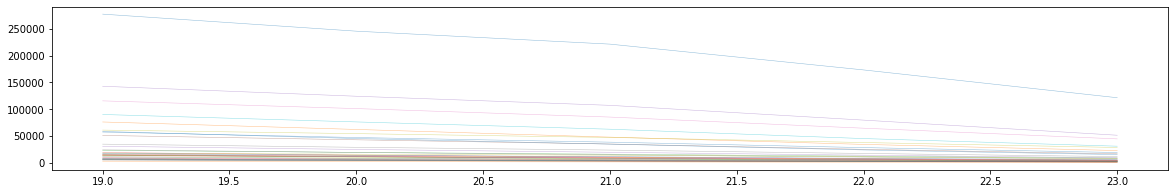

In [137]:
fig = plt.figure(figsize = (10,5))
for i in range(len(df)):
    plt.plot(df.iloc[i, 0:6], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 6:19], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 19:24], alpha = 0.5, linewidth = 0.5)

## Kmeans clustering을 통해서 특성이 비슷한 도로 추출

In [154]:
from sklearn.cluster import KMeans

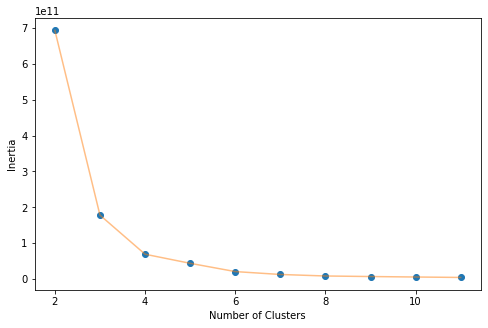

In [155]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (8, 5))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], df)

In [156]:
kmeans = KMeans(n_clusters=4, random_state = 2)
km_cluster = kmeans.fit_predict(df.iloc[:,:])

In [157]:
df_clust = df.copy()
df_clust['km_cluster'] = km_cluster
df_clust['km_cluster'] = df_clust['km_cluster'].map({0:1, 1:3, 2:2, 3:0})

In [158]:
df_clust

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,km_cluster
10,80173.623188,56958.166667,45276.000000,44243.642336,60451.605839,113564.941606,198701.598540,266732.175182,286127.204380,297369.978102,...,355188.426471,365293.705882,369459.698529,335238.036765,277572.352941,245752.264706,221562.360294,173364.213235,121464.860294,3
100,14637.514493,9971.543478,8235.379562,9517.306569,15585.000000,28735.846715,52821.182482,80249.963504,84341.255474,90012.138686,...,110664.889706,112852.735294,114953.919118,101100.926471,76171.779412,62229.558824,47894.720588,34289.360294,22820.786765,1
101,1191.695652,832.840580,720.394161,754.343066,1103.401460,2178.284672,4494.291971,7204.416058,8747.613139,9778.700730,...,13302.977941,13263.132353,13000.286765,11274.985294,7516.147059,5497.941176,4252.522059,2796.529412,1839.882353,2
120,3398.949275,2504.376812,2136.605839,2271.481752,3506.350365,5852.773723,9972.007299,15757.153285,20428.569343,23424.043796,...,32290.948529,32624.433824,31071.801471,26519.573529,19127.088235,14300.875000,10812.198529,7588.492647,5071.500000,2
121,1061.710145,693.934783,496.036496,479.773723,702.452555,1787.372263,4753.160584,8476.416058,9633.941606,9208.007299,...,11382.580882,12109.720588,12865.338235,11454.257353,7516.772059,5472.227941,4037.757353,2884.169118,1735.676471,2
140,940.739130,696.550725,581.802920,590.372263,778.000000,1353.116788,2598.817518,4533.248175,5673.605839,6155.525547,...,8531.750000,8643.000000,9037.764706,8321.176471,5634.007353,3967.352941,2989.617647,2066.919118,1385.404412,2
150,29371.782609,20529.905797,15929.248175,15785.058394,23621.233577,50237.467153,81141.956204,103681.000000,115630.459854,130898.058394,...,164515.411765,164395.227941,156267.272059,137538.941176,115598.544118,101184.992647,85340.470588,64557.029412,44581.794118,0
160,986.413043,675.985507,515.102190,523.437956,811.919708,1635.532847,3147.985401,4907.386861,5710.233577,6020.350365,...,7465.455882,7629.352941,7733.286765,6858.022059,5075.316176,3999.830882,3240.647059,2334.139706,1536.205882,2
200,2293.826087,1752.195652,1504.729927,1558.722628,1994.700730,3422.934307,6295.182482,10043.189781,11888.014599,14400.321168,...,20763.507353,21561.595588,21676.205882,18376.382353,13707.830882,10176.323529,7721.705882,5316.941176,3448.154412,2
201,1609.326087,1275.123188,1219.386861,1557.722628,1880.014599,2368.306569,3392.255474,5167.255474,6386.832117,7641.576642,...,11018.808824,11024.294118,10713.911765,9351.750000,7083.294118,5838.985294,4721.051471,3447.617647,2327.750000,2


In [174]:
df_clust[df_clust.km_cluster==3].iloc[:,1:7]

시간,7,8,9,10,11,12,13,14,15,16,17
10,266732.175182,286127.20438,297369.978102,322980.138686,331155.226277,323143.233577,331228.272059,343933.948529,355188.426471,365293.705882,369459.698529


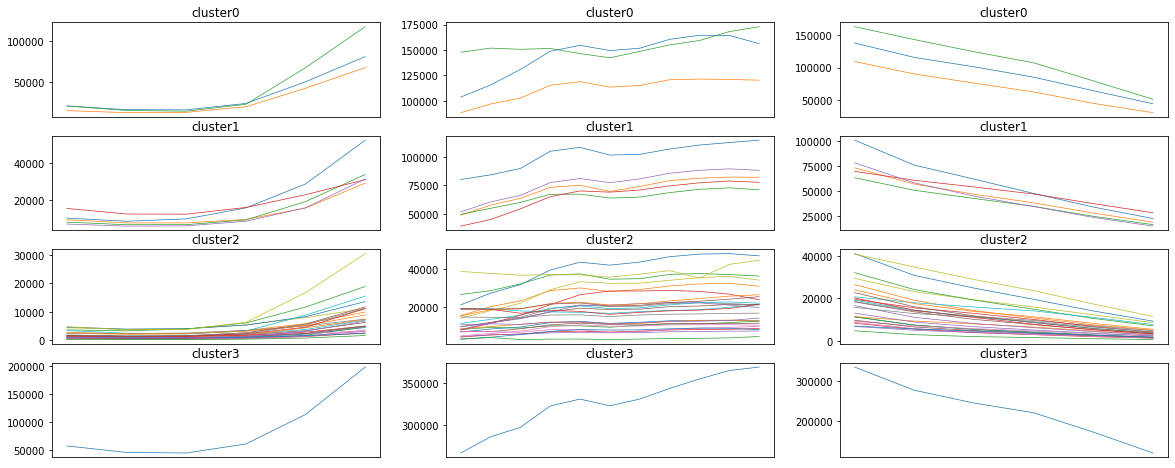

In [213]:
n_c = len(np.unique(df_clust.km_cluster)) 

fig = plt.figure(figsize = (20,8))
for c in range(n_c):
    temp = df_clust[df_clust.km_cluster == c]
    plt.subplot(n_c,3,3*c +1)                            
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,1:7], linewidth=0.7, ) #새벽시간대
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])
    plt.subplot(n_c,3,3*c +2)   
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,7:18], linewidth=0.7) #출퇴근시간대
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])
    plt.subplot(n_c,3,3*c +3)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,18:24], linewidth=0.7) #저녁시간대
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])

In [224]:
df_clust[df_clust['km_cluster']==3].T.columns

Index(['10'], dtype='object')

## 나눠진 도로 리스트로 만듬

In [217]:
cluster_0 = ['150','500','1000']

In [221]:
cluster_1 =['100', '251', '352', '450', '550']

In [223]:
cluster_2 = ['101', '120', '121', '140', '160', '200', '201', '270', '300', '301',
       '351', '370', '400', '600', '650', '652', '1020', '1040', '1100',
       '1200', '1510', '2510', '3000', '4510', '5510', '6000']

In [225]:
cluster_3 = ['10']